# Data Visualization - IMDb

## Intro

Obiettivo è indagare la correlazione tra la durata dei film e il rating medio. Come per la musica, chi vede i film se sono troppo lunghi o troppo corti ne è influenzato?

https://www.imdb.com/interfaces/

## Importazione e Caricamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframeTitoli = pd.read_csv("./data/title_basics.tsv", sep="\t", low_memory=False)
dataframeRating = pd.read_csv("./data/title_ratings.tsv", sep="\t", low_memory=False)

In [3]:
dataframeTitoli.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
dataframeRating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1849
1,tt0000002,6.0,241
2,tt0000003,6.5,1616
3,tt0000004,6.0,156
4,tt0000005,6.2,2442


In [5]:
mergedDataframe = pd.merge(dataframeTitoli, dataframeRating, on="tconst")

In [6]:
mergedDataframe.shape

(1206957, 11)

In [7]:
mergedDataframe.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1849
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,241
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1616
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,156
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2442


In [8]:
mergedDataframe.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1849
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,241
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1616
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.0,156
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2442


## Data Cleaning

In [9]:
mergedDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206957 entries, 0 to 1206956
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1206957 non-null  object 
 1   titleType       1206957 non-null  object 
 2   primaryTitle    1206957 non-null  object 
 3   originalTitle   1206957 non-null  object 
 4   isAdult         1206957 non-null  object 
 5   startYear       1206957 non-null  object 
 6   endYear         1206957 non-null  object 
 7   runtimeMinutes  1206957 non-null  object 
 8   genres          1206955 non-null  object 
 9   averageRating   1206957 non-null  float64
 10  numVotes        1206957 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 110.5+ MB


Check for null values

In [10]:
mergedDataframe.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
averageRating     0
numVotes          0
dtype: int64

Dropping unnecessary columns

In [11]:
mergedDataframe = mergedDataframe.drop(['isAdult', 'endYear'], axis=1)

In [12]:
mergedDataframe.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')

Fix data types

In [13]:
mergedDataframe.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [14]:
mergedDataframe['titleType'] = pd.Categorical(mergedDataframe['titleType'])

In [15]:
mergedDataframe['titleType'].cat.categories

Index(['movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie', 'tvSeries',
       'tvShort', 'tvSpecial', 'video', 'videoGame'],
      dtype='object')

Problema dato da caratteri \N presenti nel dataset

In [16]:
mergedDataframe.runtimeMinutes = pd.to_numeric(mergedDataframe.runtimeMinutes, errors ='coerce').fillna(0).astype('int')

In [17]:
mergedDataframe.sort_values(by='runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
1150196,tt8273150,movie,Logistics,Logistics,2012,51420,Documentary,6.1,112
918905,tt3854496,movie,Ambiancé,Ambiancé,2020,43200,Documentary,5.2,77
550886,tt12095652,video,The Longest Video on YouTube: 596.5 Hours,The Longest Video on YouTube: 596.5 Hours,2011,35791,\N,6.8,14
840477,tt2659636,movie,Modern Times Forever,Modern Times Forever,2011,14400,Documentary,6.4,91
532256,tt11707418,tvSpecial,Svalbard Minute by Minute,Svalbard minutt for minutt,2020,13319,"Adventure,Documentary",8.1,21


In [18]:
mergedDataframe.dtypes

tconst              object
titleType         category
primaryTitle        object
originalTitle       object
startYear           object
runtimeMinutes       int32
genres              object
averageRating      float64
numVotes             int64
dtype: object

In [19]:
mergedDataframe.startYear = pd.to_numeric(mergedDataframe.startYear, errors ='coerce').fillna(0).astype('int')

## Modellazione

Risolvo criticità null values

In [20]:
mergedDataframe[mergedDataframe['runtimeMinutes'] == 0].shape

(337217, 9)

Divisione tra movie e altri

In [21]:
# waffle
from pywaffle import Waffle
num_film = 273895
num_tot = 1206952
num_altri = num_tot - num_film

In [22]:
perc_films = num_film / num_tot * 100
print(perc_films)

22.693114556336955


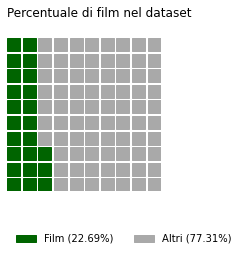

In [23]:
data = {'Film': 22.69, 'Altri': 77.31}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentuale di film nel dataset\n', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

In [24]:
FilmDataframe = mergedDataframe[mergedDataframe['titleType'] == "movie"]

In [25]:
FilmDataframe.shape

(273884, 9)

Scelta anno di interesse (2021) e numero minimo di voti espressi pari a 15000

In [26]:
film2021 = FilmDataframe[(FilmDataframe['startYear'] == 2021)]

In [27]:
film2021 = film2021[film2021['runtimeMinutes'] != 0]

In [28]:
film2021 = film2021[film2021['numVotes'] > 15000]

In [76]:
# violin
import plotly.io as pio
import plotly.express as px
fig = px.violin(film2021, y="runtimeMinutes", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
                template='simple_white'
               )
fig.update_layout(
    title="Distribuzione variabile durata (in minuti)",
    xaxis_title="2021",
    yaxis_title="Durata (Minuti)")
fig.update_layout(yaxis_range=[25,275])
fig.show()
fig.write_html("./violin.html")

In [83]:
fig = px.violin(film2021, y="averageRating", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
                template='simple_white'
               )
fig.update_layout(
    title="Distribuzione variabile average rating",
    xaxis_title="2021",
    yaxis_title="Average Rating")
fig.update_layout(yaxis_range=[0,10])
fig.show()
fig.write_html("./violin2.html")

In [30]:
film2021.shape

(172, 9)

In [31]:
film2021.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230


In [32]:
film2021.sort_values(by='runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
562212,tt12361974,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,2021,242,"Action,Adventure,Fantasy",8.1,356311
1191865,tt9389998,movie,Pushpa: The Rise - Part 1,Pushpa: The Rise - Part 1,2021,179,"Action,Adventure,Crime",8.0,33382
476390,tt10579952,movie,Master,Master,2021,179,"Action,Thriller",7.8,67154
526288,tt11580854,movie,Sarpatta Parambarai,Sarpatta Parambarai,2021,173,"Action,Drama,Sport",8.7,19704
460576,tt10280296,movie,Sardar Udham,Sardar Udham,2021,164,"Biography,Crime,Drama",8.7,34851


In [33]:
film2021.sort_values(by='runtimeMinutes').head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
529738,tt11657662,movie,The Witcher: Nightmare of the Wolf,The Witcher: Nightmare of the Wolf,2021,83,"Action,Adventure,Animation",7.3,38843
1200192,tt9684220,movie,Bad Trip,Bad Trip,2021,86,Comedy,6.6,22654
1159821,tt8521876,movie,Yes Day,Yes Day,2021,86,"Comedy,Family",5.7,21793
1204766,tt9844522,movie,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,2021,88,"Action,Adventure,Horror",5.8,32122
537390,tt11804152,movie,Till Death,Till Death,2021,88,Thriller,5.9,16696


## Visualizzazione

Calcolo del rating medio

In [34]:
avg_rating = film2021['averageRating'].mean()
avg_rating = avg_rating.round(2)
avg_rating

6.49

Calcolo della durata media

In [35]:
avg_minutes = film2021['runtimeMinutes'].mean()
avg_minutes = avg_minutes.round(2)
avg_minutes

119.8

In [36]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

Calcolo diametro per area punti

In [37]:
# calcolo diametro
import math

def calcola_diametro(numVoti):
    return 2 * math.sqrt(numVoti / math.pi)

In [38]:
film2021['size'] = film2021.numVotes.apply(func=calcola_diametro)

In [39]:
film2021.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523,449.263567
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938,259.620406
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135,457.146774
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409,451.928182
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230,333.263688


Normalizzazione dell'area

In [40]:
min = film2021['size'].min()
min

138.54272314662572

In [41]:
max = film2021['size'].max()
max

758.6778814153477

In [42]:
film2021['size'] = ((film2021['size'] - min) / (max - min) * 10) + 5

In [43]:
film2021.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523,10.010534
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938,6.952440
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135,10.137655
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409,10.053503
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230,8.139976


In [44]:
film2021['size'].min()

5.0

In [45]:
film2021['size'].max()

15.0

Aggiunta colore

In [46]:
# rosso
def get_color(numVoti):
    max2 = film2021.numVotes.max()
    min2 = film2021.numVotes.min()
    numVoti = int(round((numVoti - min2) / (max2 - min2) * 205 + 50))
    color_string = "#{0:02X}0000".format(numVoti)
    return color_string

In [47]:
# blu
def get_color(numVoti):
    max2 = film2021.numVotes.max()
    min2 = film2021.numVotes.min()
    numVoti = int(round((numVoti - min2) / (max2 - min2) * 150+105))
    color_string = "#0000{0:02X}".format(numVoti)
    return color_string

In [48]:
film2021['color'] = film2021.numVotes.apply(func=get_color)

In [49]:
film2021.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,size,color
175113,tt0293429,movie,Mortal Kombat,Mortal Kombat,2021,110,"Action,Adventure,Fantasy",6.1,158523,10.010534,#00009A
262147,tt0499097,movie,Without Remorse,Without Remorse,2021,109,"Action,Thriller,War",5.8,52938,6.952440,#000076
413028,tt0870154,movie,Jungle Cruise,Jungle Cruise,2021,127,"Action,Adventure,Comedy",6.6,164135,10.137655,#00009C
444900,tt0993840,movie,Army of the Dead,Army of the Dead,2021,148,"Action,Crime,Horror",5.7,160409,10.053503,#00009B
447239,tt10016180,movie,The Little Things,The Little Things,2021,128,"Crime,Drama,Mystery",6.3,87230,8.139976,#000082


Aggiunta deviazione standard

In [50]:
runtimeMinutesStandardDeviation = film2021["runtimeMinutes"].std()
averageRatingsStandardDeviation = film2021["averageRating"].std()

In [51]:

top_rating = avg_rating + averageRatingsStandardDeviation
low_rating = avg_rating - averageRatingsStandardDeviation
top_minutes = avg_minutes + runtimeMinutesStandardDeviation
low_minutes = avg_minutes - runtimeMinutesStandardDeviation
print(top_rating)
print(low_rating)

7.649537581875107
5.330462418124894


In [52]:
from bokeh.plotting import figure, show, save, output_file
from bokeh.layouts import layout, row, column
from bokeh.models import Div, RangeSlider, Spinner,Span, Label, LabelSet, ColumnDataSource, NumeralTickFormatter, HoverTool, Rect, BoxAnnotation, LabelSet,VeeHead, Title, Arrow
from bokeh.models.callbacks import CustomJS
from bokeh.models import Range1d, LinearColorMapper, ColorBar
import iqplot
import numpy as np
datasource = ColumnDataSource(film2021)
output_file("./Template_Bicocca_2022/scatter.html")
p = figure(title="\n",  x_axis_label="Durata (Minuti)", y_axis_label="Rating", width=600)
# p.x_range = Range1d(film2021["runtimeMinutes"].min(), film2021["runtimeMinutes"].max()) 
p.y_range = Range1d(0, 10)
p.x_range = Range1d(80,250) 
tooltips = [
  ('Durata (Min)','@runtimeMinutes'),
  ('Rating','@averageRating'),
  ('Titolo','@primaryTitle'),
  ('Voti', '@numVotes')
]
riga_avg_rating = Span(location=avg_rating, dimension="width", line_width=2, line_color="#AAAAAA")
riga_avg_minutes = Span(location=avg_minutes, dimension="height", line_width=2, line_color="#AAAAAA")
p.circle(line_width=0, x="runtimeMinutes", y="averageRating", size="size", fill_color="color", line_color="white", source=datasource)
p.add_tools(HoverTool(tooltips = tooltips))

p.add_layout(riga_avg_rating)
p.add_layout(riga_avg_minutes)
#bande deviazione standard
bandaRating =  BoxAnnotation(bottom=low_rating, top=top_rating, fill_alpha=0.1, fill_color='#0072B2')
p.add_layout(bandaRating)
bandaMinutes =  BoxAnnotation(left=low_minutes, right=top_minutes, fill_alpha=0.1, fill_color='#0072B2')
p.add_layout(bandaMinutes)
#Labels
labelsData = pd.DataFrame(dict(x = [242,125, 89, 164, 163], y=[8.10, 1.5, 8.2, 9.3, 5.2], text=["Zack Snyder's Justice League","The cost of deception","Seaspiracy", "Jai Bihim", "Toofaan"]))
etichette = LabelSet(x="x",x_offset = 5, y = "y",y_offset = -10, text = "text", source=ColumnDataSource(labelsData), )
p.add_layout(etichette)
#Box PLot minutes
q1 = film2021.runtimeMinutes.quantile(q=0.25)
q2 = film2021.runtimeMinutes.quantile(q=0.5)
q3 = film2021.runtimeMinutes.quantile(q=0.75)
qmin = film2021.runtimeMinutes.quantile(q=0.00)
qmax = film2021.runtimeMinutes.quantile(q=1.00)
iqr = q3 - q1
upper = film2021.runtimeMinutes.max()
lower = film2021.runtimeMinutes.min()
s2 = figure(x_axis_label="Minuti", y_axis_label="Rating")
s2.segment(x0 = 2, x1 = 3, y0= lower, y1=lower , line_width=2, line_color="black")
s2.segment(x0 = 2, x1 = 3, y0= upper, y1=upper , line_width=2, line_color="black")
s3 = iqplot.strip(data=film2021.runtimeMinutes.values,  jitter=True,
    marker_kwargs=dict(alpha=0.5),
    frame_height=50, frame_width=590)
s4 = iqplot.strip(data=film2021.averageRating.values,  jitter=True,q_axis="y",
  marker_kwargs=dict(alpha=0.5),
  frame_height=590, frame_width=50)
rettangolo = Rect(x = 2.5, y= (q3 + q1)/2, width= 3, height=q3-q1, fill_color="#cab2d6")

rettangolo1 =  Rect(x = 2.5, y= (lower + q1)/2, width= 0.01, height=q1-lower, fill_color="black")
rettangolo2 =  Rect(x = 2.5, y= (upper + q3)/2, width= 0.01, height=upper-q3, fill_color="black")

s3.axis.visible=False
s3.xgrid.grid_line_color = None
s3.ygrid.grid_line_color = None
s3.height=50
s3.toolbar.logo = None
s3.toolbar_location = None
s3.toolbar.active_drag = None
s3.toolbar.active_scroll = None
s3.toolbar.active_tap = None

s4.axis.visible=False
s4.xgrid.grid_line_color = None
s4.ygrid.grid_line_color = None
s4.height=50
s4.toolbar.logo = None
s4.toolbar_location = None
s4.toolbar.active_drag = None
s4.toolbar.active_scroll = None
s4.toolbar.active_tap = None
#---------------------------
#histogram votes
arr_hist, edges=np.histogram(film2021['averageRating'], bins=[0,1,2,3,4,5,6,7,8,9,10])
hist_dataframe =  pd.DataFrame({'Count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
p_hist_votes = figure()


p_hist_votes.quad(bottom=hist_dataframe['left'], top=hist_dataframe['right'], 
      left=-hist_dataframe['Count'], right=0, 
      fill_color='#66B3FF', )
p_hist_votes.axis.visible=False
p_hist_votes.title.text_color="#fff"
p_hist_votes.plot_height=480
p_hist_votes.frame_width=50
p_hist_votes.xgrid.grid_line_color = None
p_hist_votes.ygrid.grid_line_color = None
p_hist_votes.toolbar.logo = None
p_hist_votes.toolbar_location = None
p_hist_votes.toolbar.active_drag = None
p_hist_votes.toolbar.active_scroll = None
p_hist_votes.toolbar.active_tap = None
p_hist_votes.margin = (15,0,0,0)
#------------------
#histogram minutes
arr_hist_min, edges_min=np.histogram(film2021['runtimeMinutes'], bins=[*range(80,250, 5)])
hist_dataframe_minutes =  pd.DataFrame({'Count': arr_hist_min, 'left': edges_min[:-1], 'right': edges_min[1:]})
p_hist_minutes = figure(x_axis_location = "above")


p_hist_minutes.quad(bottom=-hist_dataframe_minutes['Count'], top=0, 
      left=hist_dataframe_minutes['left'], right=hist_dataframe_minutes['right'], 
      fill_color='#66B3FF', )
p_hist_minutes.axis.visible=False
p_hist_minutes.title.text_color="#fff"
p_hist_minutes.plot_height=50
p_hist_minutes.frame_width=575
p_hist_minutes.xgrid.grid_line_color = None
p_hist_minutes.ygrid.grid_line_color = None
p_hist_minutes.toolbar.logo = None
p_hist_minutes.toolbar_location = None
p_hist_minutes.toolbar.active_drag = None
p_hist_minutes.toolbar.active_scroll = None
p_hist_minutes.toolbar.active_tap = None
p_hist_minutes.margin = (0,15,0,15)
#------------------
#freccia
p.add_layout(Arrow(end=VeeHead(size=5),x_start = 255, x_end=245, y_start =9.35, y_end=8.35 ))
p.add_layout(Label(x=250, y=9.35, x_offset=1, y_offset=1, text="Film più lungo", text_font_size="13px", text_font_style="italic"))

p.add_layout(Arrow(end=VeeHead(size=5),x_start = 176, x_end=166, y_start =10.5, y_end=9.5 ))
p.add_layout(Label(x=170, y=10.5, x_offset=1, y_offset=1, text="Film con rating\npiù alto", text_font_size="13px", text_font_style="italic"))

p.add_layout(Arrow(end=VeeHead(size=5),x_start = 113, x_end=123, y_start =0.35, y_end=1.35 ))
p.add_layout(Label(x=90, y=-0.5, x_offset=1, y_offset=1, text="Film con rating\npiù basso", text_font_size="13px", text_font_style="italic"))

p.add_layout(Arrow(end=VeeHead(size=5),x_start = 77, x_end=87, y_start =9.35, y_end=8.35 ))
p.add_layout(Label(x=60, y=9.35, x_offset=1, y_offset=1, text="Film con rating alto\nnonostante breve durata", text_font_size="13px", text_font_style="italic"))
#-----------------
mapper = LinearColorMapper(palette=film2021.color.sort_values(), low=film2021.numVotes.min(), high=film2021.numVotes.max())
color_bar = ColorBar(color_mapper=mapper, width=250, height=20, orientation='horizontal', major_label_overrides={'100000':'100K', '200000':'200K', '300000':'300K', '400000':'400K'})
p.add_layout(color_bar, "below")
p.add_layout(Title(text="Fonte IMDb", text_font_size="10pt", align="right", ), "below")
show(row(p_hist_votes, column (p, p_hist_minutes) ))
#L'area dei punti indicano il numero di voti ottenuti su IMDb. Le dimensioni sono calcolate base all'area e non in base al diametro.

magari aggiungere valore della media nel grafico o hover su linea

aumenta grandezza nel file html

titolo di impatto per "point"

In [53]:
hist_dataframe.head(20)

,Count,left,right
0,0,0,1
1,2,1,2
2,1,2,3
3,1,3,4
4,6,4,5
5,39,5,6
6,64,6,7
7,43,7,8
8,15,8,9
9,1,9,10


Calcolo correlazione

In [54]:
film2021['runtimeMinutes'].corr(film2021['averageRating'])

0.4025927747404564

## Valutazione qualità

In [13]:
import pandas as pd 
data = {

   "Domanda" : [
     1,1,1,1,1,1,1,1,1,1,1,1,
   2,2,2,2,2,2,2,2,2,2,2,2,
   3,3,3,3,3,3,3,3,3,3,3,3,
   4,4,4,4,4,4,4,4,4,4,4,4,
   5,5,5,5,5,5,5,5,5,5,5,5,5],
  "Risultati" : [
    2,3,4,4,4,5,5,6,6,6,6,6,6
  ,3,5,5,5,5,5,5,5,6,6,6,6
  ,3,4,4,4,4,4,4,5,5,6,6, 6,
  3,5,5,5,6,6,6,6,6,6,6,6 ,
  3,4,4,4,5,5,5,5,5,6,6,6],
  
}
dataframePsicometrico = pd.DataFrame(data)


In [14]:
import plotly.io as pio
import plotly.express as px
fig = px.violin(dataframePsicometrico, box=True, # draw box plot inside the violin
                y="Risultati",
                x="Domanda",
                points='all', # can be 'outliers', or False
                template='simple_white'
               )
fig.update_layout(
    title="Distribuzione risposte alle domande del questionario",
    xaxis_title="Domanda",yaxis_title="Voto")
fig.show()
fig.write_html("./violin_psico.html")

# Test utente

In [35]:
import pandas as pd 
data = {

   "Domanda" : [
  1,1,1,1,1,1,
  2,2,2,2,2,2,
  3,3,3,3,3,3,
  4,4,4,4,4,4],
  "Risultati" : [
  1,1,1,1,1,0,
  1,1,1,1,1,1,
  1,1,0,1,1,1,
  0,0,1,0,0,1],
  "Tempo": [
  10,19,13,15,8,4,
  3,4,6,5,3,5,
  8,1,5,9,7,5,
  4,7,11,9,8,10]
  
}
dataframePsicometrico = pd.DataFrame(data)

In [57]:
numero_giuste = dataframePsicometrico[dataframePsicometrico["Risultati"] == 1].shape[0]
numero_sbagliate = dataframePsicometrico[dataframePsicometrico["Risultati"] == 0].shape[0]
print(numero_giuste/24 )
print(numero_sbagliate/24)
lower_confidence = 0.2104
upper_confidence = 0.1523

0.75
0.25


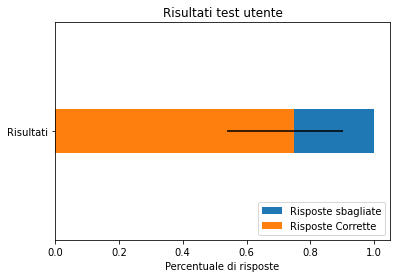

In [75]:
import numpy as np
import matplotlib.pyplot as plt

p2 = plt.barh(["Risultati"], [1])
p1 = plt.barh(["Risultati"], [0.75], xerr=[[lower_confidence],[upper_confidence]])

plt.xlabel('Percentuale di risposte')
plt.title('Risultati test utente')
plt.legend(["Risposte sbagliate","Risposte Corrette"], loc ="lower right")
plt.ylim(-2, 2)
plt.show()

In [81]:
import plotly.io as pio
import plotly.express as px
fig = px.violin(dataframePsicometrico, box=True, # draw box plot inside the violin
                y="Tempo",
                x="Domanda",
                points='all', # can be 'outliers', or False
                template='simple_white'
               )
fig.update_layout(
    title="Distribuzione dei tempi di risposta del test utente.",
    xaxis_title="Domanda",yaxis_title="Tempo")
fig.show()
fig.write_html("./violin_tempo.html")